In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
# For NLP(text cleaning)
import nltk
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# For file handeling operations
import os
from glob import glob
from tqdm import tqdm

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Absolute path of all the .txt files
abs_filepaths = glob("/content/drive/MyDrive/ML L&T EduTech/Task-6/News Articles/*/*.txt")

# Read it and store it in a list
news_articles = []

for abs_filepath in tqdm(abs_filepaths, colour='yellow'):
    try:
        # Open the file
        f = open(abs_filepath,"r")
        # Read the contents of the file
        news_article = f.read()
        # Append it in a list
        news_articles.append(str(news_article))
    except:
        f = open(abs_filepath,'rb')
        # Read the contents of the file
        news_article = f.read()
        # Append it in a list
        news_articles.append(str(news_article))

100%|██████████| 746/746 [02:15<00:00,  5.50it/s]


In [6]:
news_articles[0]

'US actor \'found with gun residue\'\n\nActor Robert Blake had gunshot residue on his hands and clothes the night his wife was shot dead, a court has heard.\n\nBut it may not have come from the shot that killed Bonny Lee Bakley in 2001, Mr Blake\'s murder trial was told by criminalist Steven Dowell. Mr Dowell told a Los Angeles court the residue may have come from Mr Blake\'s revolver, his gun collection, his presence at the crime scene or police. The 71-year-old former star of US TV drama Baretta has denied murder. Mr Blake said he found Ms Bakley, 44, dead in a car after they left a restaurant.\n\nHe said he briefly returned to the restaurant to collect a gun he had left behind and discovered her body when he returned. The gun he collected was not the murder weapon. It could also have been picked up if he touched or leant on the car when he found the body, or from a police box in which his clothes were later stored. The box had come from an area where officers went after being on the

In [7]:
# Create a stemmer object which will be used to stem all the words to its root
ps = PorterStemmer()

In [8]:
# Empty list to store the clean text
clean_articles = []

for article in tqdm(news_articles, colour='yellow'):
    # Replace the end lines <\n>
    article = article.replace("\\n",'')

    # Remove all excepth the alphabets
    article = re.sub("[^a-zA-Z]",' ', article)

    # Lower all the aplhabets
    article = article.lower()

    # Split the article on spaces, returning a list of words
    words = article.split()

   # Remove stopwords
    clean_article = [ps.stem(word) for word in words if not word in stopwords.words("english")]

    # Join clean words
    clean_article = " ".join(clean_article)

    # Append the tweet
    clean_articles.append(clean_article)

100%|██████████| 746/746 [00:32<00:00, 22.77it/s]


In [9]:
clean_articles[0]

'us actor found gun residu actor robert blake gunshot residu hand cloth night wife shot dead court heard may come shot kill bonni lee bakley mr blake murder trial told criminalist steven dowel mr dowel told lo angel court residu may come mr blake revolv gun collect presenc crime scene polic year old former star us tv drama baretta deni murder mr blake said found ms bakley dead car left restaur said briefli return restaur collect gun left behind discov bodi return gun collect murder weapon could also pick touch leant car found bodi polic box cloth later store box come area offic went fire rang mr dowel also said residu would present mr blake fire gun night wit alreadi told trial mr blake stood quit nervou agit restaur murder actor emmi play maverick detect tv cop drama baretta could face life prison convict'

In [10]:
# Initialize a vectorizer object
tfidf = TfidfVectorizer()

# Fit transform the clean article to create vectors
article_vectors = tfidf.fit_transform(clean_articles)

In [11]:
article_vectors

<746x10409 sparse matrix of type '<class 'numpy.float64'>'
	with 94340 stored elements in Compressed Sparse Row format>

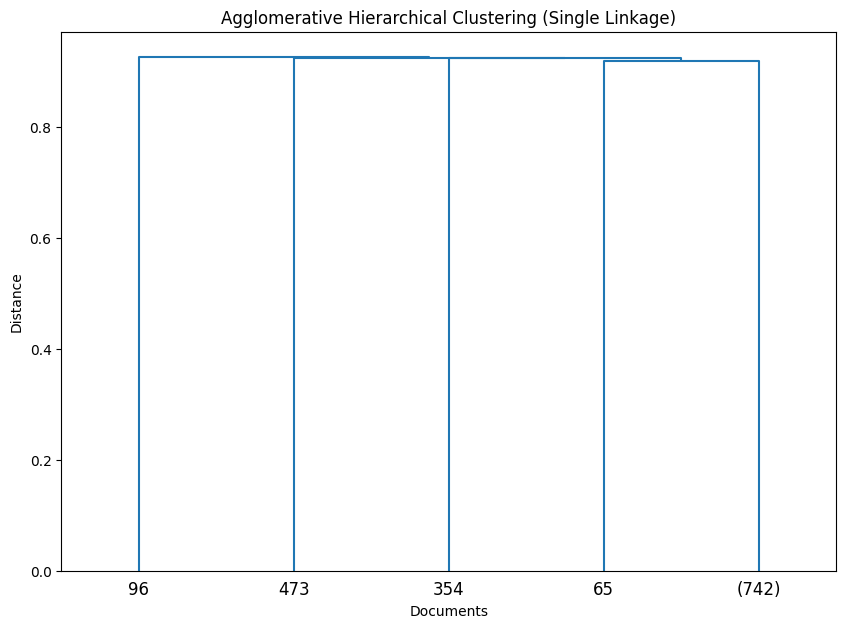

In [13]:
# Perform agglomerative hierarchical clustering with single linkage
linkage_single = linkage(article_vectors.toarray(), method='single', metric='cosine')
plt.figure(figsize=(10, 7))
dendrogram(linkage_single, truncate_mode='level', p=3)
plt.title("Agglomerative Hierarchical Clustering (Single Linkage)")
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()

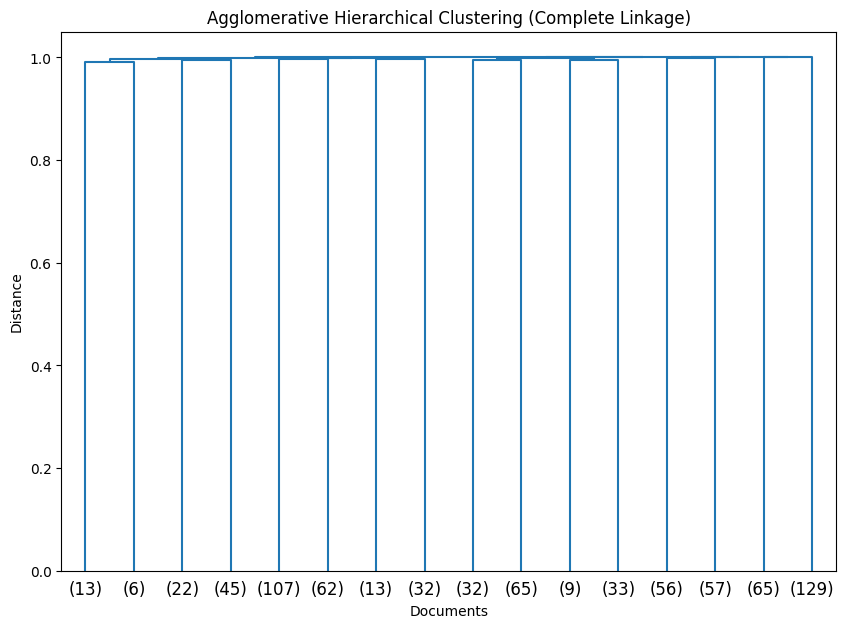

In [14]:
# Perform agglomerative hierarchical clustering with complete linkage
linkage_complete = linkage(article_vectors.toarray(), method='complete', metric='cosine')
plt.figure(figsize=(10, 7))
dendrogram(linkage_complete, truncate_mode='level', p=3)
plt.title("Agglomerative Hierarchical Clustering (Complete Linkage)")
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()

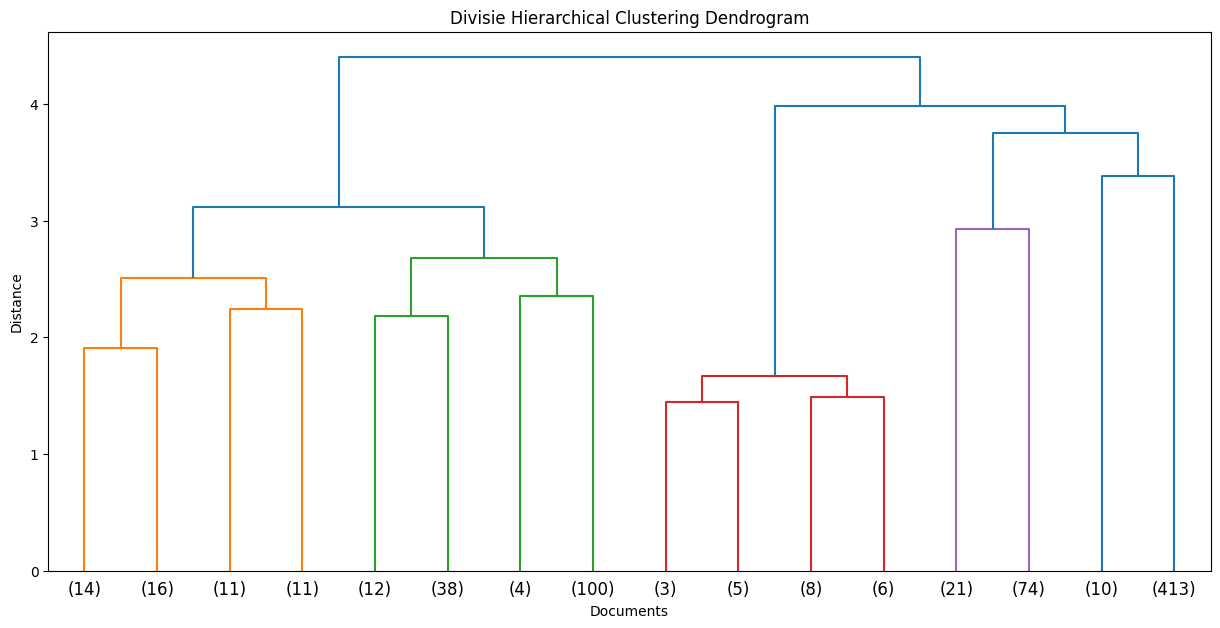

In [15]:
# Calculate the pairwise distance matrix
pairwise_distances = linkage(article_vectors.toarray(), method='ward')

# Visualize the agglomerative clustering dendrogram
plt.figure(figsize=(15, 7))
dendrogram(pairwise_distances, truncate_mode='level', p=3)
plt.title("Divisie Hierarchical Clustering Dendrogram")
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()